In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import IPython
import IPython.display
import matplotlib.pyplot as plt
from matplotlib import dates
import plotly as py
from plotly.offline import iplot, init_notebook_mode
from datetime import datetime as dt
import datetime
import glob

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

# Read data from directory

In [2]:
path = 'C:/Users/codepanda/Desktop/NTUST/dispenser_data/'
files = glob.glob(path + '/*.csv')
data = []
for file in files:
    df = pd.read_csv(file, index_col=None, header=0)
    data.append(df)
dispenser_data = pd.concat(data, axis=0, ignore_index=True)
dispenser_data

,UploadTime,HotTemp,WarmTemp,ColdTemp,HotValve,WarmValve,Usage_CC,Usage_L,Usage_MT,ColdValve,SavingPower,Heating,Cooling,Refilling,Error
0,2020-10-15 00:04:24,95,36,15,0,0,961,104,99,0,1,0,0,0,0
1,2020-10-15 00:04:25,94,36,15,0,0,961,104,99,0,1,0,0,0,0
2,2020-10-15 00:04:26,94,36,15,0,0,961,104,99,0,1,0,0,0,0
3,2020-10-15 00:04:27,94,36,15,0,0,961,104,99,0,1,0,0,0,0
4,2020-10-15 00:04:28,94,36,15,0,0,961,104,99,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420522,2020-11-12 12:45:01,97,33,18,0,0,133,233,101,0,0,1,0,0,0
2420523,2020-11-12 12:45:01,97,33,18,0,0,133,233,101,0,0,1,0,0,0
2420524,2020-11-12 12:45:01,97,33,18,0,0,133,233,101,0,0,1,0,0,0
2420525,2020-11-12 12:45:01,97,33,18,0,0,133,233,101,0,0,1,0,0,0


# Drop irrelevant features

In [3]:
dispenser_data.drop(columns=['HotTemp', 'WarmTemp', 'ColdTemp', 'SavingPower', 'Heating', 'Cooling', 'Refilling', 'Error'], inplace=True)
dispenser_data

,UploadTime,HotValve,WarmValve,Usage_CC,Usage_L,Usage_MT,ColdValve
0,2020-10-15 00:04:24,0,0,961,104,99,0
1,2020-10-15 00:04:25,0,0,961,104,99,0
2,2020-10-15 00:04:26,0,0,961,104,99,0
3,2020-10-15 00:04:27,0,0,961,104,99,0
4,2020-10-15 00:04:28,0,0,961,104,99,0
...,...,...,...,...,...,...,...
2420522,2020-11-12 12:45:01,0,0,133,233,101,0
2420523,2020-11-12 12:45:01,0,0,133,233,101,0
2420524,2020-11-12 12:45:01,0,0,133,233,101,0
2420525,2020-11-12 12:45:01,0,0,133,233,101,0


# Calculate total water usage in cc/second with function

In [4]:
def calculate_usage(cc, l, mt):
    total_usage = lambda a, b, c : a + (b*1000) + (c*1000000)
    usage = []

    for i in dispenser_data.index:
        if i == 0:
            usage.append(0)
            prev = total_usage(cc[i], l[i], mt[i])
            continue

        temp = total_usage(cc[i], l[i], mt[i])
        usage.append(temp - prev)
        prev = temp
    
    return usage

dispenser_data['Usage_CC'] = calculate_usage(dispenser_data['Usage_CC'], dispenser_data['Usage_L'], dispenser_data['Usage_MT'])
dispenser_data.drop(columns=['Usage_L', 'Usage_MT'], inplace=True)
dispenser_data

,UploadTime,HotValve,WarmValve,Usage_CC,ColdValve
0,2020-10-15 00:04:24,0,0,0,0
1,2020-10-15 00:04:25,0,0,0,0
2,2020-10-15 00:04:26,0,0,0,0
3,2020-10-15 00:04:27,0,0,0,0
4,2020-10-15 00:04:28,0,0,0,0
...,...,...,...,...,...
2420522,2020-11-12 12:45:01,0,0,0,0
2420523,2020-11-12 12:45:01,0,0,0,0
2420524,2020-11-12 12:45:01,0,0,0,0
2420525,2020-11-12 12:45:01,0,0,0,0


# Change UploadTime data type to datetime

In [5]:
dispenser_data['UploadTime'] = pd.to_datetime(dispenser_data['UploadTime'], format='%Y-%m-%d %H:%M:%S')
dispenser_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420527 entries, 0 to 2420526
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   UploadTime  datetime64[ns]
 1   HotValve    int64         
 2   WarmValve   int64         
 3   Usage_CC    int64         
 4   ColdValve   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 92.3 MB


# Drop duplicates data in UploadTime feature

In [6]:
dispenser_data.drop_duplicates(subset=['UploadTime'], inplace=True)
dispenser_data.set_index('UploadTime', inplace=True)

# Resample data to hourly interval

,HotValve,WarmValve,Usage_CC,ColdValve
UploadTime,,,,
2020-10-15 00:00:00,0,0,0,0
2020-10-15 01:00:00,0,0,38,0
2020-10-15 02:00:00,0,0,0,0
2020-10-15 03:00:00,0,0,0,0
2020-10-15 04:00:00,0,0,0,0
...,...,...,...,...
2020-11-12 08:00:00,4,6,342,0
2020-11-12 09:00:00,70,26,5244,42
2020-11-12 10:00:00,31,86,6688,41


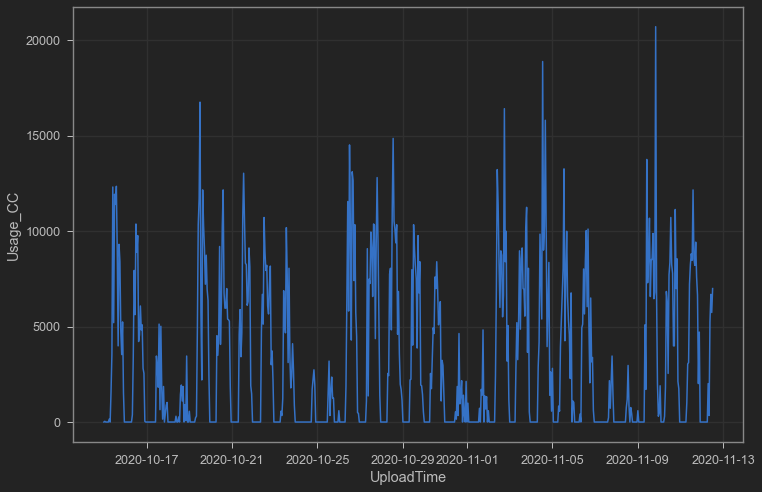

In [26]:
sample_data = dispenser_data.resample('h').sum()
plt.figure(figsize=(12,8))
display(sample_data)
sns.lineplot(x='UploadTime', y='Usage_CC', data=sample_data)
plt.show()

# Check statistics and missing values

In [8]:
# checking missing values
sample_data.isna().sum()

HotValve     0
WarmValve    0
Usage_CC     0
ColdValve    0
dtype: int64

In [9]:
# checking data statistiscs
sample_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
HotValve,685.0,13.105109,22.507648,0.0,0.0,0.0,19.0,186.0
WarmValve,685.0,24.563504,35.502213,0.0,0.0,4.0,38.0,179.0
Usage_CC,685.0,3082.145985,3920.050556,0.0,0.0,1026.0,5738.0,20710.0
ColdValve,685.0,29.929927,47.866020,0.0,0.0,0.0,50.0,404.0


Text(0.5, 1.0, 'Usage_CC')

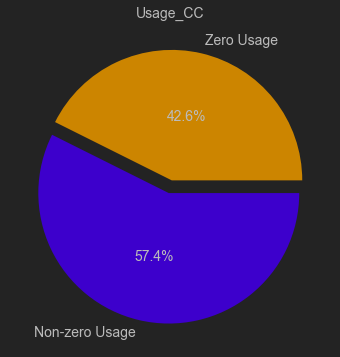

In [10]:
zero_usage = sample_data['Usage_CC'].isin([0]).sum()
usage_val = zero_usage, (sample_data['Usage_CC'].count() - zero_usage)

pie, ax = plt.subplots(figsize=[10,6])
labels = ['Zero Usage', 'Non-zero Usage']
plt.pie(x=usage_val, autopct="%.1f%%", explode=[0.05]*2, labels=labels,
        pctdistance=0.5, textprops={'fontsize': 14}, colors=['#cc8500', '#3d00cc'])

plt.title("Usage_CC", fontsize=14)

Text(0.5, 1.0, 'Water Usage Frequency Distribution')

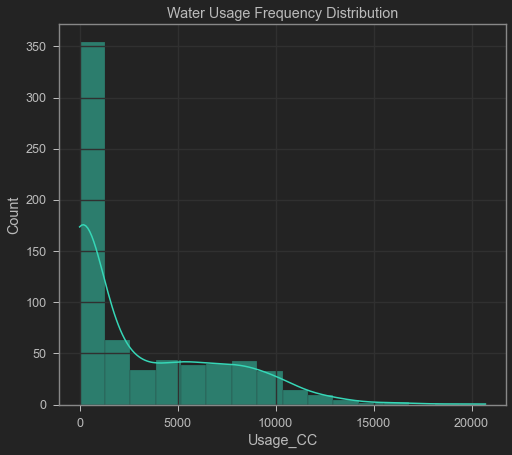

In [27]:
sns.histplot(data=sample_data, x='Usage_CC', kde= True, color='#36D7B7')
plt.title('Water Usage Frequency Distribution')

# Split the data

In [31]:
column_indices = {name: i for i, name in enumerate(sample_data.columns)}

n = len(sample_data)
train_df = sample_data[0:int(n*0.7)]
val_df = sample_data[int(n*0.7):int(n*0.9)]
test_df = sample_data[int(n*0.9):]


# Normalize the data

,HotValve,WarmValve,Usage_CC,ColdValve
UploadTime,,,,
2020-10-15 00:00:00,-0.552761,-0.692522,-0.788349,-0.642873
2020-10-15 01:00:00,-0.552761,-0.692522,-0.778484,-0.642873
2020-10-15 02:00:00,-0.552761,-0.692522,-0.788349,-0.642873
2020-10-15 03:00:00,-0.552761,-0.692522,-0.788349,-0.642873
2020-10-15 04:00:00,-0.552761,-0.692522,-0.788349,-0.642873
...,...,...,...,...
2020-11-03 18:00:00,0.961752,1.426695,1.855372,2.687228
2020-11-03 19:00:00,2.565353,1.002852,2.131581,2.491339
2020-11-03 20:00:00,-0.552761,-0.026482,0.158656,0.706579


<AxesSubplot:title={'center':'Water Usage Frequency Distribution [normed]'}, xlabel='Usage_CC', ylabel='Count'>

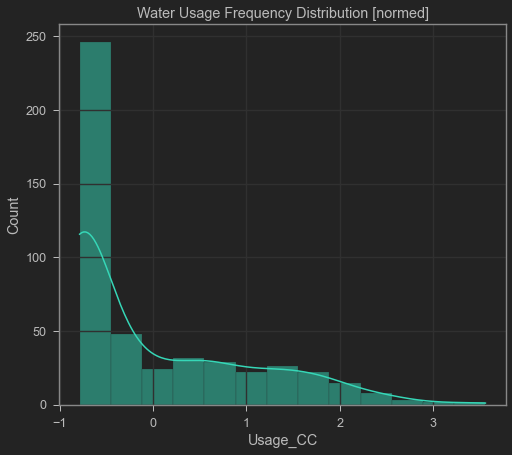

In [55]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

display(train_df)
plt.title('Water Usage Frequency Distribution [normed]')
sns.histplot(data=train_df, x='Usage_CC', kde= True, color='#36D7B7')

# Data windowing 

### Data windowing class

In [166]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
    # method for splitting the window
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    # method for plotting the window
    def plot(self, model=None, plot_col='Usage_CC', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)

            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions', 
                            c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()
            
        plt.xlabel('Time[48h]')
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
                data=data,
                targets=None,
                sequence_length=self.total_window_size,
                sequence_stride=1,
                shuffle=True,
                batch_size=32,)

        ds = ds.map(self.split_window)
        
        return ds
    
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

### Create usage_window instance

In [167]:
water_usage = WindowGenerator(input_width = 48, label_width = 1, shift = 1, label_columns=['Usage_CC'])
water_usage

Total window size: 49
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48]
Label column name(s): ['Usage_CC']

### Plotting the usage_window

In [168]:
example_window = tf.stack([np.array(train_df[:water_usage.total_window_size]),
                           np.array(train_df[100:100+water_usage.total_window_size]),
                           np.array(train_df[200:200+water_usage.total_window_size])])

example_inputs, example_labels = water_usage.split_window(example_window)
water_usage.example = example_inputs, example_labels

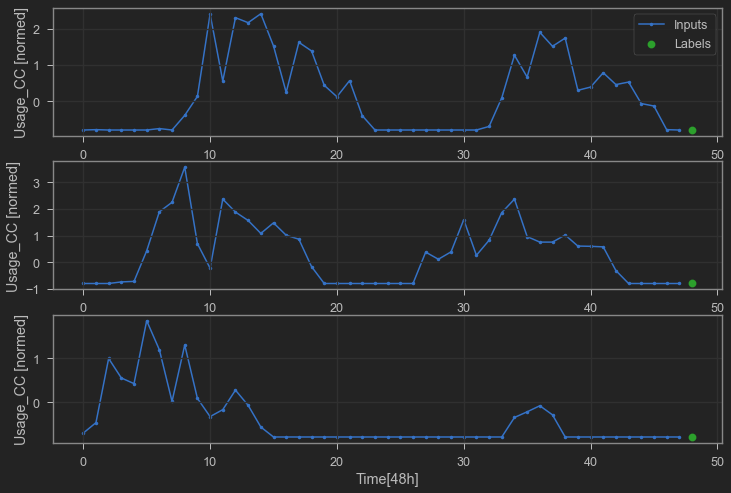

In [169]:
water_usage.plot(plot_col='Usage_CC')

### Create tf.data.Datasets

In [170]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    
    # Get and cache an example batch of `inputs, labels` for plotting.
    result = getattr(self, '_example', None)
    
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
        
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [173]:
# Each element is an (inputs, label) pair
water_usage.train.element_spec
for example_inputs, example_labels in water_usage.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 48, 4)
Labels shape (batch, time, features): (32, 1, 1)


# Baseline

In [125]:
single_usage_window = WindowGenerator(
    input_width=48, label_width=1, shift=1,
    label_columns=['Usage_CC'])

for example_inputs, example_labels in single_usage_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 48, 4)
Labels shape (batch, time, features): (32, 1, 1)


In [129]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [131]:
baseline = Baseline(label_index=column_indices['Usage_CC'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_usage_window.val)
performance['Baseline'] = baseline.evaluate(single_usage_window.test, verbose=0)

3/3 [==============================] - 0s 1ms/step - loss: 1.4605 - mean_absolute_error: 0.7936


# Single step models with LSTM

In [132]:
water_usage =  WindowGenerator(input_width = 48, label_width = 48, shift = 1, label_columns=['Usage_CC'])

water_usage

Total window size: 49
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
Label column name(s): ['Usage_CC']

In [133]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

print('Input shape:', water_usage.example[0].shape)
print('Output shape:', lstm_model(water_usage.example[0]).shape)

Input shape: (32, 48, 4)
Output shape: (32, 48, 1)


In [139]:
MAX_EPOCHS = 1000

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
            optimizer=tf.optimizers.Adam(),
            metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                  validation_data=window.val,
                  callbacks=[early_stopping])
    
    return history

In [140]:
history = compile_and_fit(lstm_model, water_usage)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(water_usage.val)
performance['LSTM'] = lstm_model.evaluate(water_usage.test, verbose=0)

3/3 [==============================] - 0s 5ms/step - loss: 0.2707 - mean_absolute_error: 0.3555


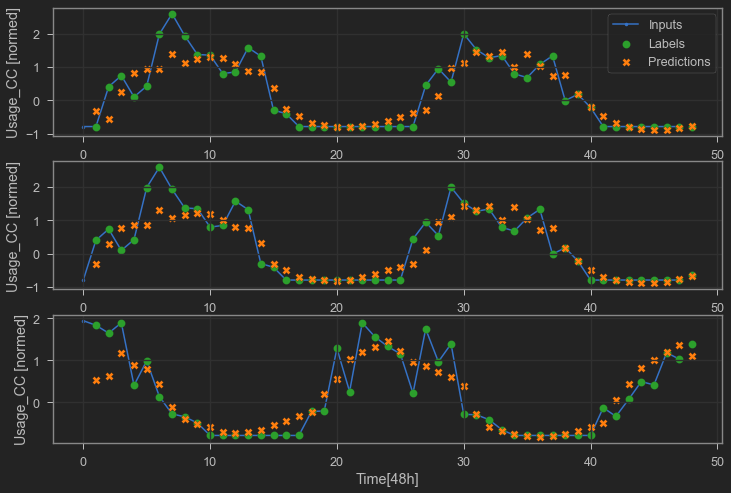

In [141]:
water_usage.plot(lstm_model)

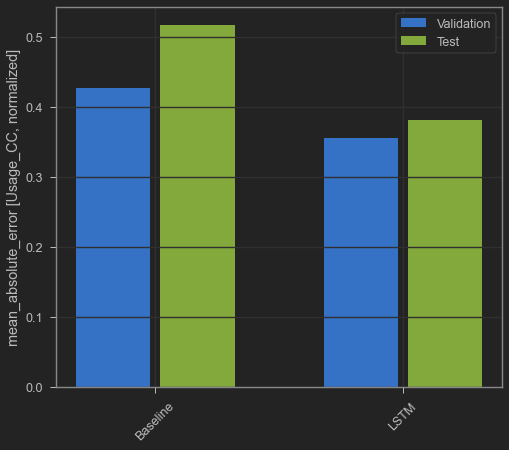

In [120]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Usage_CC, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()